In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
df= pd.read_csv('Train.csv')
df_test= pd.read_csv('Test.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
median=df['Item_Weight'].median()
mode= df['Outlet_Size'].mode().values[0]

In [8]:
df['Item_Weight']=df['Item_Weight'].replace(np.nan,median)
df['Outlet_Size']=df['Outlet_Size'].replace(np.nan,mode)
df_test['Item_Weight']=df_test['Item_Weight'].replace(np.nan,median)
df_test['Outlet_Size']=df_test['Outlet_Size'].replace(np.nan,mode)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [11]:
content= df.groupby(['Item_Identifier'])
content.size()

Item_Identifier
DRA12    6
DRA24    7
DRA59    8
DRB01    3
DRB13    5
        ..
NCZ30    7
NCZ41    5
NCZ42    5
NCZ53    5
NCZ54    7
Length: 1559, dtype: int64

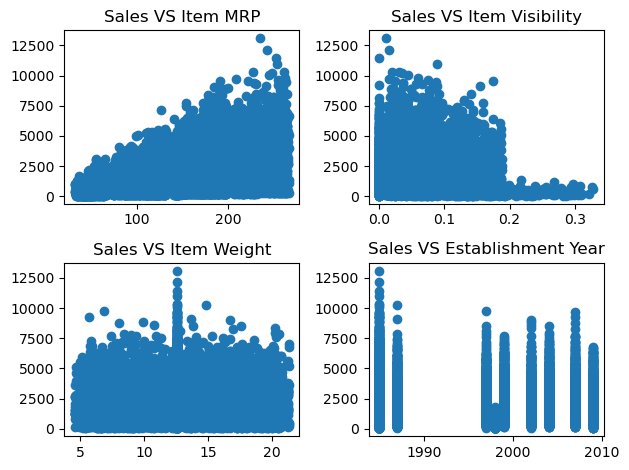

In [12]:
fig, axis= plt.subplots(2,2)
axis[0,0].scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
axis[0,0].set_title('Sales VS Item MRP')

axis[0,1].scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
axis[0,1].set_title('Sales VS Item Visibility')

axis[1,0].scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
axis[1,0].set_title('Sales VS Item Weight')

axis[1,1].scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
axis[1,1].set_title('Sales VS Establishment Year')



plt.tight_layout()
plt.show()

In [13]:
test= df.groupby(['Item_Fat_Content'])
test.size()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
dtype: int64

In [14]:
def change(data):
    for i in range (0,len(data)):
        if "LF" in data[i] or "low fat" in data[i]:
            data[i]="Low Fat"
        elif "reg" in data[i]:
            data[i]="Regular"
    return data

In [15]:
df['Item_Fat_Content']= change(df['Item_Fat_Content'])
df_test['Item_Fat_Content']= change(df_test['Item_Fat_Content'])

/var/folders/ky/2lvqh9yn4ssgjvzd5nhcx5lm0000gn/T/ipykernel_1105/553387924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]="Low Fat"
/var/folders/ky/2lvqh9yn4ssgjvzd5nhcx5lm0000gn/T/ipykernel_1105/553387924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]="Regular"


In [16]:
test= df.groupby(['Item_Fat_Content'])
test.size()

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [17]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


In [18]:
"""By looking at the correlation table we can identify that Item MRP and Item Weight are directly proportional to    Item Sales. And the Item Visibility and Outlet Establishment Year being inversly proportional to it."""

'By looking at the correlation table we can identify that Item MRP and Item Weight are directly proportional to    Item Sales. And the Item Visibility and Outlet Establishment Year being inversly proportional to it.'

<function matplotlib.pyplot.show(close=None, block=None)>

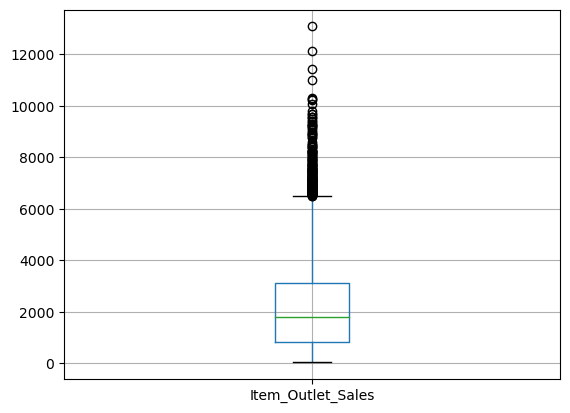

In [19]:
df.boxplot(column=['Item_Outlet_Sales'])
plt.show

In [20]:
def remove_outliers(data):
    sorted(data)
    Q1,Q3=data.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range,upper_range

In [21]:
Q1,Q3=df['Item_Outlet_Sales'].quantile([0.25,0.75])
IQR= Q3-Q1
lower_range= Q1 - (1.5*IQR)
upper_range= Q3 + (1.5*IQR)
outlier= [x for x in df['Item_Outlet_Sales'] if x<lower_range or x>=upper_range]
len(outlier)

186

In [22]:
Outlier1=[x if x>lower_range and x<upper_range  else np.nan for x in df['Item_Outlet_Sales']]
len(Outlier1)

8523

In [23]:
df['Item_Outlet_Sales']=Outlier1

In [24]:
df.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales            186
dtype: int64

In [25]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [26]:
df=df.dropna()
df.shape

(8337, 12)

In [27]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

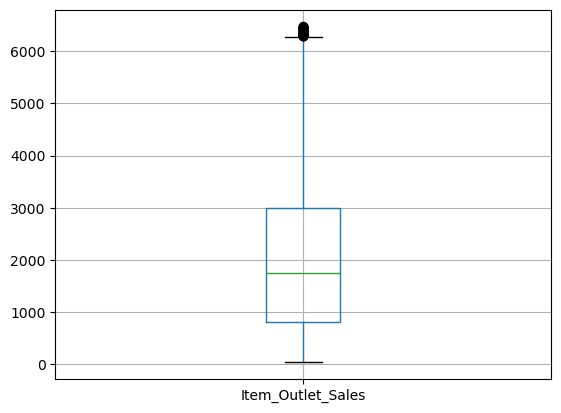

In [28]:
df.boxplot(column=['Item_Outlet_Sales'])
plt.show

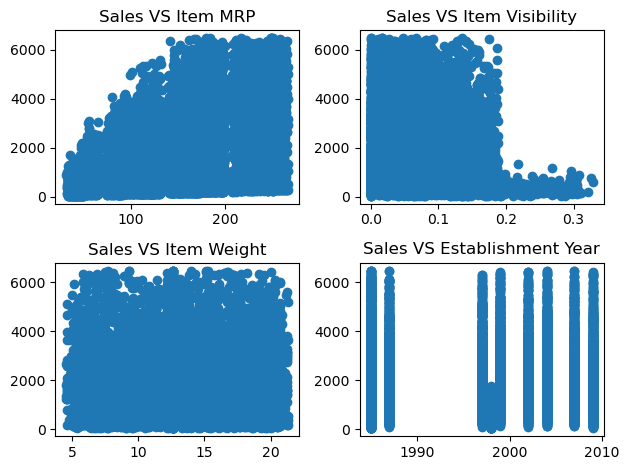

In [29]:
fig, axis= plt.subplots(2,2)
axis[0,0].scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
axis[0,0].set_title('Sales VS Item MRP')

axis[0,1].scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
axis[0,1].set_title('Sales VS Item Visibility')

axis[1,0].scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
axis[1,0].set_title('Sales VS Item Weight')

axis[1,1].scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
axis[1,1].set_title('Sales VS Establishment Year')



plt.tight_layout()
plt.show()

In [30]:
#We can see that Outlet 027 has the highest sale
#And 018 and 019 has the least sale

In [31]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']
for i in var_mod:
    df[i] = LE.fit_transform(df[i])
    df_test[i]=LE.fit_transform(df_test[i])

/var/folders/ky/2lvqh9yn4ssgjvzd5nhcx5lm0000gn/T/ipykernel_1105/3530023325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = LE.fit_transform(df[i])


In [32]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
df_test = pd.get_dummies(df_test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,0,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,1,0,0,1,0,1,0,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,0,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,1,0,0,1,0,1,0,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,1,0,0,0,1,1,0,0,0,1,0,0


In [34]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDW58,20.750,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1,0,0,0,1,0,0,1,0,0
1,FDW14,8.300,0.038428,Dairy,87.3198,OUT017,2007,0,1,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600,0.099575,Others,241.7538,OUT010,1998,1,0,0,0,1,0,1,0,1,0,0,0
3,FDQ58,7.315,0.015388,Snack Foods,155.0340,OUT017,2007,1,0,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.600,0.118599,Dairy,234.2300,OUT027,1985,0,1,0,0,1,0,1,0,0,0,0,1


In [35]:
xtrain = df.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier','Item_Type'], axis=1)
ytrain = df.Item_Outlet_Sales

# Linear Regression

In [36]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()

In [37]:
xtest = df_test.drop(['Outlet_Identifier','Item_Identifier','Item_Type'], axis=1)

In [38]:
ytrain.head(10)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
5     556.6088
6     343.5528
7    4022.7636
8    1076.5986
9    4710.5350
Name: Item_Outlet_Sales, dtype: float64

In [39]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [40]:
ypred = regressor.predict(xtest)

In [41]:
ypred

array([1792.78013988, 1620.82742242, 1720.58431879, ..., 1831.86296004,
       3392.39295843, 1342.9704303 ])

In [44]:
accuracy = round(regressor.score(xtrain,ytrain) * 100,2)
accuracy

55.61

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [57]:
ypred1 = regressor.predict(xtest)
ypred1

array([ 750.3566,  959.4178,  697.0926, ..., 3199.8348, 3095.97  ,
        785.644 ])

In [58]:
decision_accuracy = round(regressor.score(xtrain,ytrain),2)
tree_accuracy

0.59

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)

RandomForestRegressor()

In [54]:
ypred2 = regressor.predict(xtest)
ypred2

array([1686.03863 , 1267.004084,  614.40024 , ..., 1685.812258,
       4192.422756, 1483.349136])

In [55]:
randomaccuracy = round(regressor.score(xtrain,ytrain),2)
randomaccuracy

0.94